In [1]:
#Understanding Descriptive Statistics
#Import the necessary libraries here:

# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random



In [2]:
#Challenge 1
#1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
#Hint: you can use the choices function from module random to help you with the simulation.

# your code here

def rolldice(k):
    counter = np.arange(1, k+1).tolist()
    dice = list(np.random.choice(range(1,7),size = k))
    df = pd.DataFrame(dice, counter)
    df.reset_index(inplace=True)
    df.columns = ('counter', 'dice')
    return df

data2 = rolldice(10)
data2


,counter,dice
0,1,6
1,2,4
2,3,6
3,4,4
4,5,1
5,6,1
6,7,2
7,8,6
8,9,4
9,10,1


<AxesSubplot:>

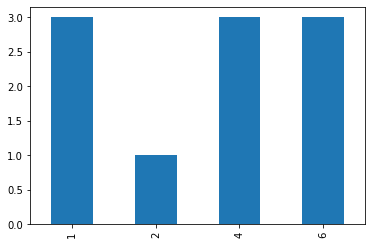

In [3]:
#2.- Plot the results sorted by value.
# your code here

data3 = data2["dice"].value_counts().sort_index()
data3.plot(kind="bar")



In [45]:
#Challenge 2
#Now, using the dice results obtained in challenge 1, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles.

#1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value.
# your code here


In [4]:
from functools import reduce

def meancalc(k):
    total = reduce(lambda a, b: a + b, k)
    return total/len(k)


In [5]:
#2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value.
# your code here

meancalc(data2['dice'])

3.5

In [54]:
#3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value.
#Hint: you might need to define two computation cases depending on the number of observations used to calculate the median.

# your code here

def median(df,index):
    columns = df.columns
    i = df[columns[index]].sort_values(ascending = True).count()
    if i%2!=0:
        median = list(df[columns[index]].sort_values(ascending = True))[int(i/2)]
    else:
        median = list(df[columns[index]].sort_values(ascending = True))[int(i/2)] + list(data[columns[index]].sort_values(ascending = True))[int(i/2+1)]
    return median
  

In [52]:
#4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles.
# your code here

def quartiles(df,index):
    x = median(df,index)
    quartiles = []
    Q1 = x/2
    Q2 = x
    Q3 = x*3/2
    quartiles.append(Q1)
    quartiles.append(Q2)
    quartiles.append(Q3)
    return quartiles


In [8]:
#Challenge 3
#Read the csv roll_the_dice_hundred.csv from the data folder.

#1.- Sort the values and plot them. What do you see?
# your code here

df = pd.read_csv('C:/Users/olivi/Documents/Ironhack/DAFT_212/module_2/Lab_4_Descriptive-Statistics/roll_the_dice_hundred.csv')
df


,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6
...,...,...,...
95,95,95,4
96,96,96,6
97,97,97,1
98,98,98,3


In [11]:
df.sort_values(by= "value")

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


<AxesSubplot:>

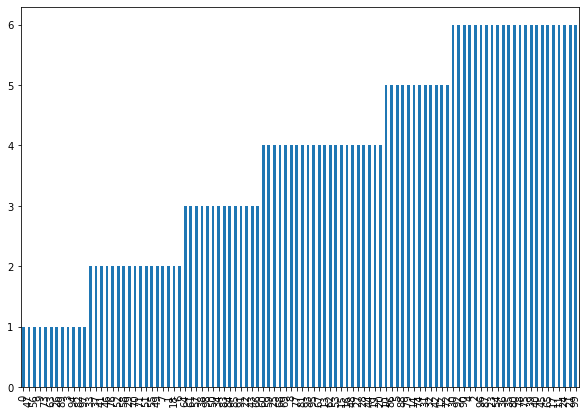

In [16]:
df["value"].sort_values().plot.bar(figsize=(10,7))

In [18]:
#2.- Using the functions you defined in challenge 2, calculate the mean value of the hundred dice rolls.
# your code here

meancalc(df['value'])


3.74

In [19]:
#3.- Now, calculate the frequency distribution.
# your code here

data = df.groupby('value').count().reset_index()
data

,value,Unnamed: 0,roll
0,1,12,12
1,2,17,17
2,3,14,14
3,4,22,22
4,5,12,12
5,6,23,23


Object `histogram` not found.


Text(0.5, 1.0, 'Histogram')

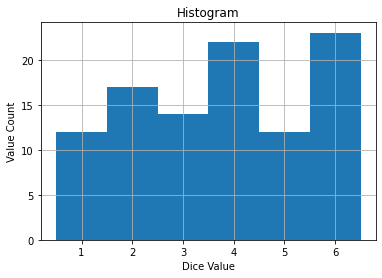

In [25]:
4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram?


bins = [n + 0.5 for n in range(0,7)]
df['value'].hist(bins=bins, grid=True)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')



In [26]:
#5.- Read the roll_the_dice_thousand.csv from the data folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?
# your code here

df = pd.read_csv('C:/Users/olivi/Documents/Ironhack/DAFT_212/module_2/Lab_4_Descriptive-Statistics/roll_the_dice_thousand.csv')
df


,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [27]:
df.groupby('value').count().reset_index()


,value,Unnamed: 0,roll
0,1,175,175
1,2,167,167
2,3,175,175
3,4,168,168
4,5,149,149
5,6,166,166


In [28]:
#Challenge 4
#In the data folder of this repository you will find three different files with the prefix ages_population. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#1.- Read the file ages_population.csv. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot.
# your code here

df = pd.read_csv('C:/Users/olivi/Documents/Ironhack/DAFT_212/module_2/Lab_4_Descriptive-Statistics/ages_population.csv')
df

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


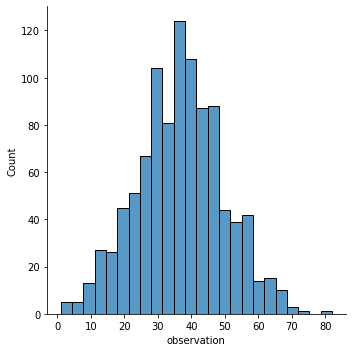

In [34]:
sns.displot(df['observation'])

In [38]:
#2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?
# your code here

df['observation'].mean()


36.56

In [39]:
df['observation'].std()

12.81649962597677

In [40]:
#3.- Now read the file ages_population2.csv . Calculate the frequency distribution and plot it.
# your code here

df = pd.read_csv('C:/Users/olivi/Documents/Ironhack/DAFT_212/module_2/Lab_4_Descriptive-Statistics/ages_population2.csv')
df


,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


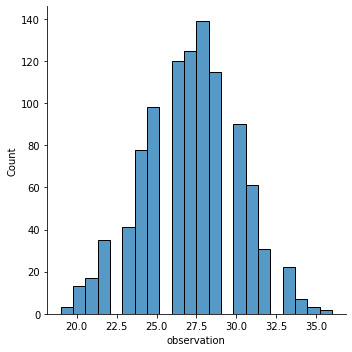

In [41]:
sns.displot(df['observation'])

In [ ]:
#4.- What do you see? Is there any difference with the frequency distribution in step 1?

#This sample seems to be totally biased towards young adults ... Seems like the poll was fully conducted at night and in a lively neighborhood :-) 


In [43]:
#5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?
# your code here

df['observation'].mean()


27.155

In [44]:
df['observation'].std()

2.9698139326891835

In [46]:
#Challenge 5
#Now is the turn of ages_population3.csv.

#1.- Read the file ages_population3.csv. Calculate the frequency distribution and plot it.
# your code here

df = pd.read_csv('C:/Users/olivi/Documents/Ironhack/DAFT_212/module_2/Lab_4_Descriptive-Statistics/ages_population3.csv')
df


,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


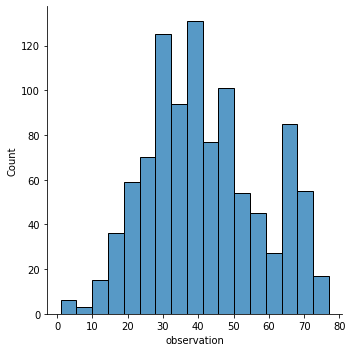

In [47]:
sns.displot(df['observation'])

In [48]:
#2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

df['observation'].mean()


41.989

In [49]:
df['observation'].std()

16.14470595986593

In [58]:
#3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

df['observation'].describe()


count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [ ]:
4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.
# your code here
"""
your comments here
"""


In [ ]:
Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

# your code here
"""
your comments here
"""